In [34]:
import numpy as np
import sys
import os
from scipy import stats
import pandas as pd
import glob as glob
import seaborn as sns
from itertools import combinations 
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline

In [35]:
def grouped_lineplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df,
                       palette="cubehelix", estimator=np.mean, ax=ax)

    sns.despine(ax=ax, left=True)
    ax.set_title(title,fontsize=24)
    ax.set_ylabel(y,fontsize=24)
    ax.set_xlabel('Order',fontsize=24)
    ax.set_ylim(ymin, ymax)
    
    handles,labels = ax.get_legend_handles_labels()
    print(labels)
    handles = [handles[1], handles[2], handles[4], handles[3]]
    labels = [labels[1], labels[2], labels[4], labels[3]]
    
    l = ax.legend(handles,labels, loc='center left', bbox_to_anchor=(1.00, .65), ncol=1,fontsize=24)
    l._legend_box.align = "center"
    for line in l.get_lines():
        line.set_linewidth(4.0)
    ax.tick_params(labelsize=24)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [36]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title, fontsize=24)
    ax.set_ylabel(y, fontsize=24)
    ax.set_xlabel(x, fontsize=24)
    ax.set_ylim(ymin, ymax)

    l = ax.legend(loc='center', bbox_to_anchor=(1, .65), ncol=1, fontsize=24)
    l._legend_box.align = "center"
    l.set_title('Order',prop={'size':24})
    
    ax.tick_params(labelsize=24)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [37]:
figdir = '../figs'
if not os.path.exists(figdir):
    os.mkdir(figdir)

In [38]:
factors = 700

In [39]:
if factors == 100:
    pieman_name = '../../data/pieman_ica100.mat'
else:
    pieman_name = '../../data/pieman_data.mat'

center_name = '../../data/pieman_posterior_K700.mat'

In [40]:
pieman_name

'../../data/pieman_data.mat'

In [41]:
pieman_data = loadmat(pieman_name)
center_data = loadmat(center_name)

In [42]:
factor_data_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results_' + str(factors))

In [43]:
#factor_data_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results')

In [44]:
analysis_name = 'level_analysis_optimized'

In [45]:
data_dir = os.path.join(factor_data_dir, analysis_name)

In [46]:
data_dir

'/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results_700/level_analysis_optimized'

In [47]:
params =glob.glob(os.path.join(data_dir, '*'))

In [48]:
params

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results_700/level_analysis_optimized/isfc_PCA_gaussian_10']

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


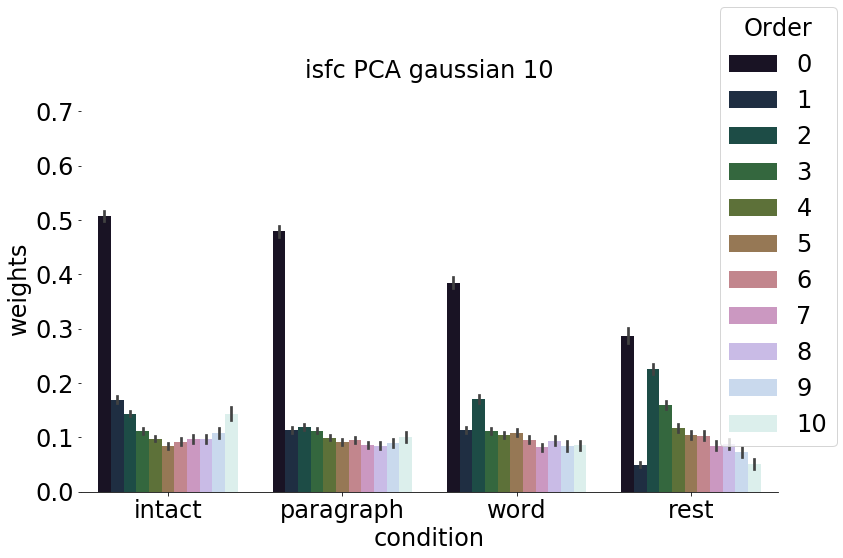

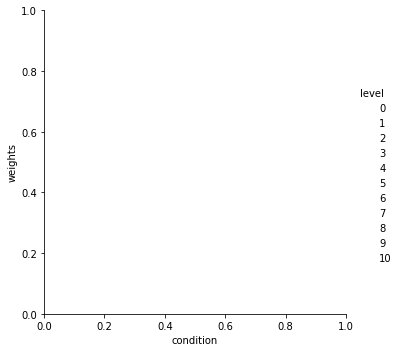

In [49]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(full_data['level'].max() + 2):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['condition'] = full_data['condition']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                #melted_temp_df['level'] = 'accuracy'
                melted_temp_df['condition'] = full_data['condition']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '_'+ str(factors)+ '.pdf')
    grouped_barplot(melted_df, 'condition', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.show()
    plt.close()

In [50]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)


/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


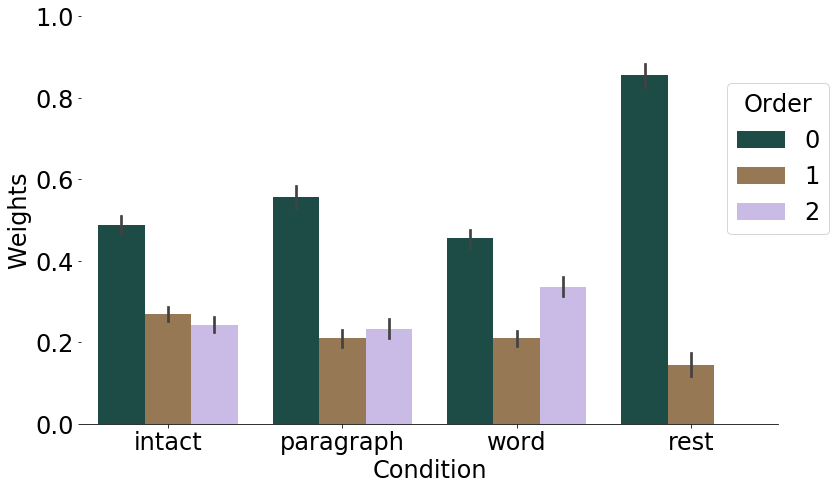

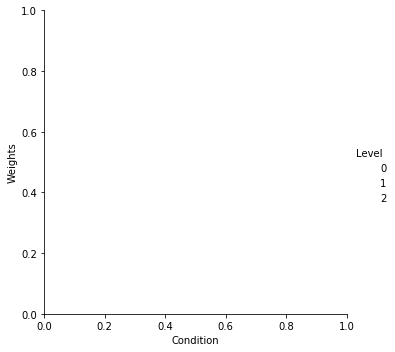

In [51]:
pieman_conds = ['intact', 'paragraph', 'word', 'rest']
new_melt = pd.DataFrame()
for cond in pieman_conds:
    p_df = full_data[full_data['condition']==cond]
    max_level = p_df.groupby('level').mean()['accuracy'].argmax()
    if cond == 'rest':
        max_level = 1
    else:
        max_level = 2
        
    p_df = p_df[p_df['level'] == max_level]

    for c in np.arange(max_level + 1):
        melted_temp_df = pd.DataFrame()

        melted_temp_df['Weights'] = p_df['level_' + str(c)]
        
        if cond != 'rest':
            melted_temp_df['max_level'] = p_df['level']

        else:
            melted_temp_df['max_level'] = p_df['level']
            melted_temp_df['max_level'] = 2
            
        melted_temp_df['Level'] = c

        melted_temp_df['Condition'] = p_df['condition']

        if new_melt.empty:
            new_melt = melted_temp_df
        else:
            new_melt= new_melt.append(melted_temp_df)
            

melted_temp_df['Weights'] = 0
melted_temp_df['Level'] = 2
new_melt= new_melt.append(melted_temp_df)

p_split = param_name.split('_')

title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '_'+ str(factors)+ '.pdf')
grouped_barplot(new_melt, 'Condition', 'Weights', 'Level', ymin=0, ymax=1, title = '', outfile=outfile)
plt.show()
plt.close()

['Condition', 'intact', 'paragraph', 'rest', 'word']


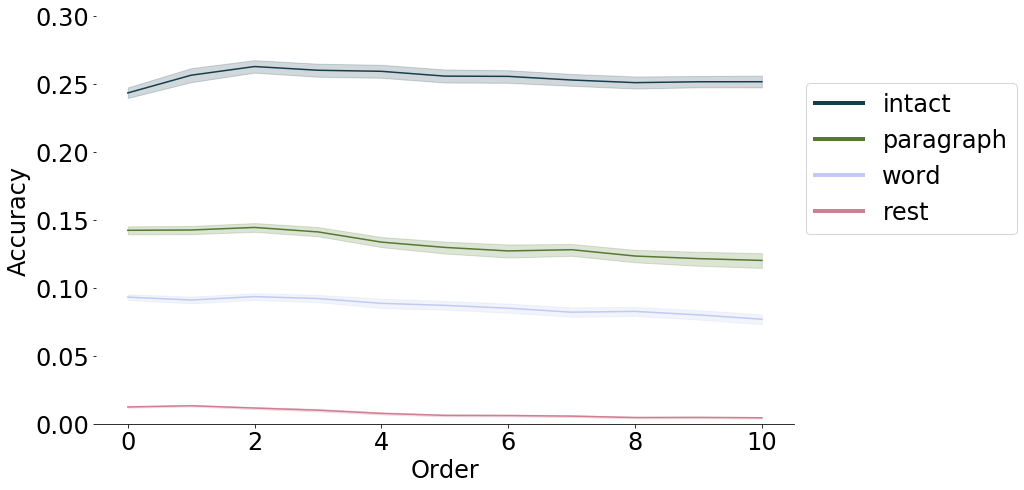

['Condition', 'intact', 'paragraph', 'rest', 'word']


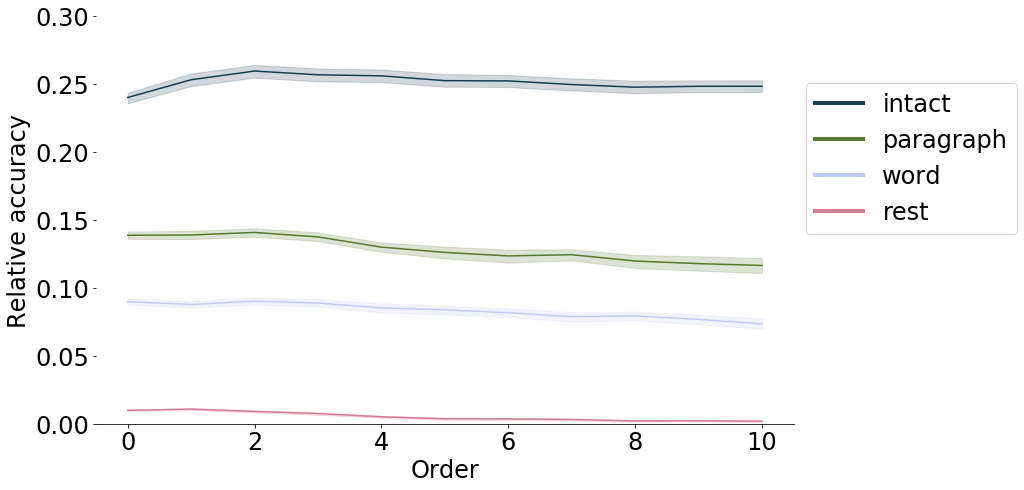

['Condition', 'intact', 'paragraph', 'rest', 'word']


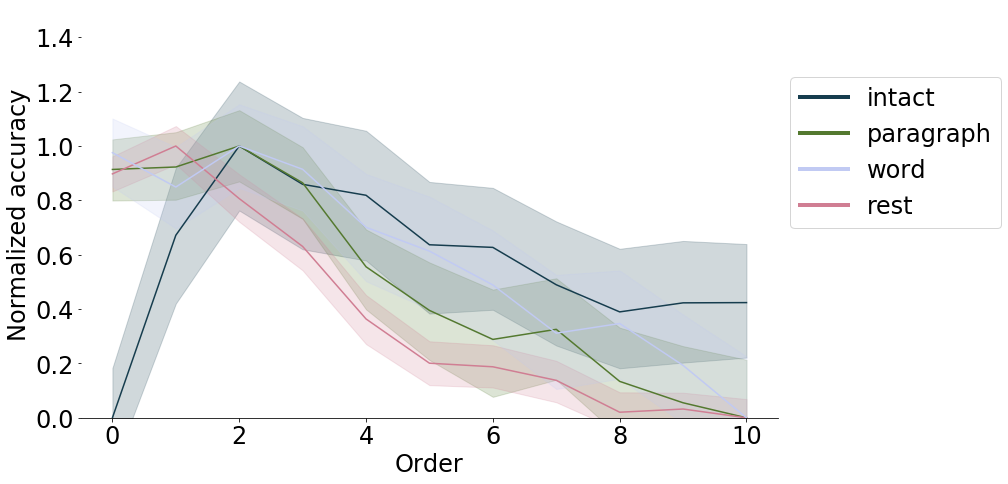

In [52]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        
        cond_name = os.path.basename(os.path.splitext(c)[0])
        chance = 1/300      
        if cond_name == 'paragraph':
            chance = 1/272
        elif cond_name == 'rest':
            chance = 1/400
        
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        #data['level'] = 20 - data.isnull().sum(axis=1)
        data['Relative accuracy'] = data['accuracy'] - chance
        data['Normalized accuracy']= data['accuracy'] - np.min(data.groupby('level')['accuracy'].mean())
        data['Normalized accuracy'] = data['Normalized accuracy'] / np.max(data.groupby('level')['Normalized accuracy'].mean())
        
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    full_data = full_data.rename(index=str, columns={"level": "Level", "accuracy": "Accuracy", "condition": "Condition"})

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 
    
    outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'Level', 'Accuracy','Condition', ymin=0, ymax=.3, title = '', outfile=outfile)
    plt.show()
    plt.close()
    
    outfile = os.path.join(figdir, param_name + '_relative_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'Level', 'Relative accuracy','Condition', title = '', ymin=0, ymax=.3, outfile=outfile)
    plt.show()
    plt.close()
    
    outfile = os.path.join(figdir, param_name + '_normalized_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'Level', 'Normalized accuracy','Condition', title = '', ymin=0, ymax=1.5, outfile=outfile)
    plt.show()
    plt.close()

In [53]:
pieman_conds = ['intact', 'paragraph', 'word', 'rest']

In [54]:
comb = combinations(pieman_conds, 2)

In [55]:
list(comb)

[('intact', 'paragraph'),
 ('intact', 'word'),
 ('intact', 'rest'),
 ('paragraph', 'word'),
 ('paragraph', 'rest'),
 ('word', 'rest')]

In [56]:
iter_min = full_data[full_data['Condition'] == 'rest'].shape[0]
pieman_conds = ['intact', 'paragraph', 'word', 'rest']
combs = combinations(pieman_conds, 2)
for c in combs:
    
    t_stat = stats.ttest_rel(full_data[full_data['Condition']==c[0]][:iter_min]['Accuracy'],full_data[full_data['Condition']==c[1]][:iter_min]['Accuracy'], nan_policy='omit')
    
    print(c[0], c[1], t_stat)


intact paragraph Ttest_relResult(statistic=124.37460095090967, pvalue=0.0)
intact word Ttest_relResult(statistic=205.12544040515564, pvalue=0.0)
intact rest Ttest_relResult(statistic=344.1063487851862, pvalue=0.0)
paragraph word Ttest_relResult(statistic=55.82792891590856, pvalue=0.0)
paragraph rest Ttest_relResult(statistic=185.96198031422415, pvalue=0.0)
word rest Ttest_relResult(statistic=159.74252023615108, pvalue=0.0)


In [57]:
#max_level = p_df.groupby('Level').mean()['Accuracy']

In [58]:
p_df = full_data[full_data['Condition']=='word']
max_level = p_df.groupby('Level').mean()['Accuracy']

In [59]:
max_level[max_level.argmax()]

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


0.09360544217687074

In [60]:
max_level.argmax()

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


2

In [61]:
pieman_conds = ['intact', 'paragraph', 'word', 'rest']
for c in pieman_conds:
    for l in np.arange(11):
        p_df = full_data[full_data['Condition']==c]
        max_level = p_df.groupby('Level').mean()['Accuracy'].argmax()
        t_stat = stats.ttest_rel(p_df[p_df['Level']==0]['Accuracy'],p_df[p_df['Level']==l]['Accuracy'], nan_policy='omit')
        print('Condition: ' + c + ' max level: ' + str(l), t_stat)

Condition: intact max level: 0 Ttest_relResult(statistic=nan, pvalue=nan)
Condition: intact max level: 1 Ttest_relResult(statistic=-6.86929333001716, pvalue=8.442769704970675e-11)
Condition: intact max level: 2 Ttest_relResult(statistic=-12.34485372985485, pvalue=3.023722010293433e-26)
Condition: intact max level: 3 Ttest_relResult(statistic=-11.08993782320011, pvalue=1.7894169012927243e-22)
Condition: intact max level: 4 Ttest_relResult(statistic=-10.193440981719206, pvalue=7.861086799333274e-20)
Condition: intact max level: 5 Ttest_relResult(statistic=-8.043045402955604, pvalue=8.330253042797637e-14)
Condition: intact max level: 6 Ttest_relResult(statistic=-8.980331055750272, pvalue=2.301989025354513e-16)
Condition: intact max level: 7 Ttest_relResult(statistic=-6.718854031195762, pvalue=1.9624900521975793e-10)
Condition: intact max level: 8 Ttest_relResult(statistic=-6.199143198871647, pvalue=3.317219626701083e-09)
Condition: intact max level: 9 Ttest_relResult(statistic=-6.70625387

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """


 Ttest_relResult(statistic=6.766432693228656, pvalue=1.4418726555160657e-10)
Condition: paragraph max level: 8 Ttest_relResult(statistic=7.823222609752289, pvalue=2.9635507805299893e-13)
Condition: paragraph max level: 9 Ttest_relResult(statistic=8.487903323383497, pvalue=4.811173417657642e-15)
Condition: paragraph max level: 10 Ttest_relResult(statistic=8.373743074671435, pvalue=9.87221841811815e-15)
Condition: word max level: 0 Ttest_relResult(statistic=nan, pvalue=nan)
Condition: word max level: 1 Ttest_relResult(statistic=1.9214301882966986, pvalue=0.05613561300158529)
Condition: word max level: 2 Ttest_relResult(statistic=-0.36341481068587084, pvalue=0.7166887089994531)
Condition: word max level: 3 Ttest_relResult(statistic=0.8299543187744046, pvalue=0.40757951352048005)
Condition: word max level: 4 Ttest_relResult(statistic=2.768937285694609, pvalue=0.006166713906951947)
Condition: word max level: 5 Ttest_relResult(statistic=4.1134675017070945, pvalue=5.744379885049066e-05)
Condi

In [62]:
analysis_name = 'level_analysis_chunked'

In [63]:
data_dir = os.path.join(factor_data_dir, analysis_name)

In [64]:
params = glob.glob(os.path.join(data_dir, '*'))

In [65]:
params

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results_700/level_analysis_chunked/isfc_PCA_gaussian_10']

In [67]:
full_data

,Unnamed: 0,Accuracy,error,folds,Level,level_0,level_1,level_10,level_2,level_3,...,level_6,level_7,level_8,level_9,rank,iteration,Third,Condition,Relative accuracy,Normalized accuracy
0,0,0.290000,0.100500,0,0,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.968044,12,0,intact,0.286667,2.524717
1,0,0.323333,0.050211,0,1,0.500004,4.999962e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.975011,12,0,intact,0.320000,4.251936
2,0,0.333333,0.066078,0,2,0.600573,2.640281e-01,NaN,1.353989e-01,NaN,...,NaN,NaN,NaN,NaN,0.975622,12,0,intact,0.330000,4.770101
3,0,0.326667,0.068389,0,3,0.623973,2.433298e-01,NaN,2.836580e-02,1.043316e-01,...,NaN,NaN,NaN,NaN,0.974856,12,0,intact,0.323333,4.424658
4,0,0.330000,0.074278,0,4,0.544527,1.883067e-01,NaN,7.390580e-02,5.295504e-02,...,NaN,NaN,NaN,NaN,0.974000,12,0,intact,0.326667,4.597379
5,0,0.330000,0.075411,0,5,0.480119,1.702734e-01,NaN,0.000000e+00,1.387635e-17,...,NaN,NaN,NaN,NaN,0.973700,12,0,intact,0.326667,4.597379
6,0,0.320000,0.064889,0,6,0.480034,2.334783e-01,NaN,1.042393e-01,8.396171e-02,...,3.366984e-02,NaN,NaN,NaN,0.975878,12,0,intact,0.316667,4.079214
7,0,0.340000,0.065556,0,7,0.377744,1.567583e-01,NaN,3.643707e-02,0.000000e+00,...,9.620346e-02,8.673260e-18,NaN,NaN,0.974044,12,0,intact,0.336667,5.115545
8,0,0.323333,0.081511,0,8,0.351201,9.457916e-02,NaN,6.568294e-02,1.107889e-01,...,1.496001e-01,1.208006e-03,7.946856e-02,NaN,0.974111,12,0,intact,0.320000,4.251936
9,0,0.293333,0.098589,0,9,0.499445,9.000711e-03,NaN,6.122086e-02,1.649107e-06,...,3.763317e-01,4.684659e-22,0.000000e+00,0.000000e+00,0.968367,12,0,intact,0.290000,2.697439


/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

['Condition', 'intact', 'paragraph', 'rest', 'word']


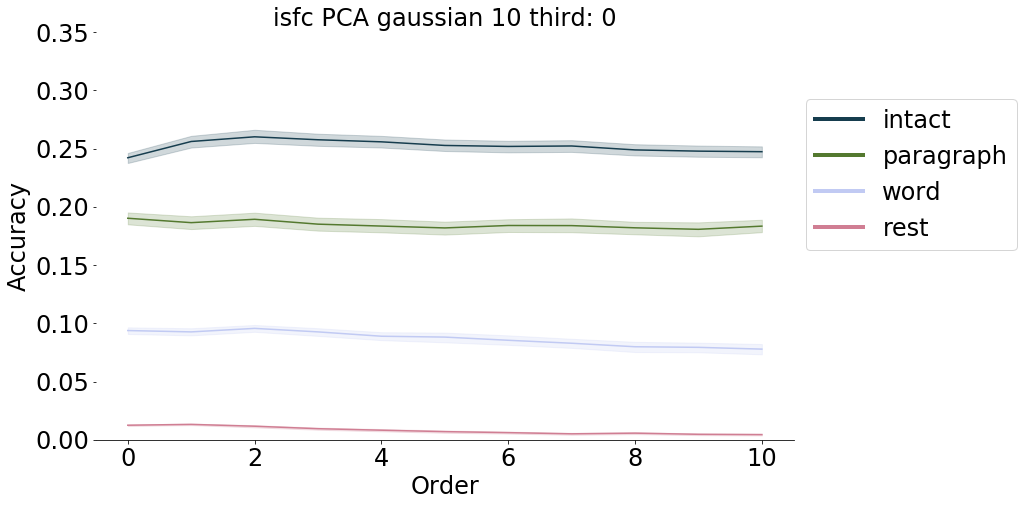

['Condition', 'intact', 'paragraph', 'rest', 'word']


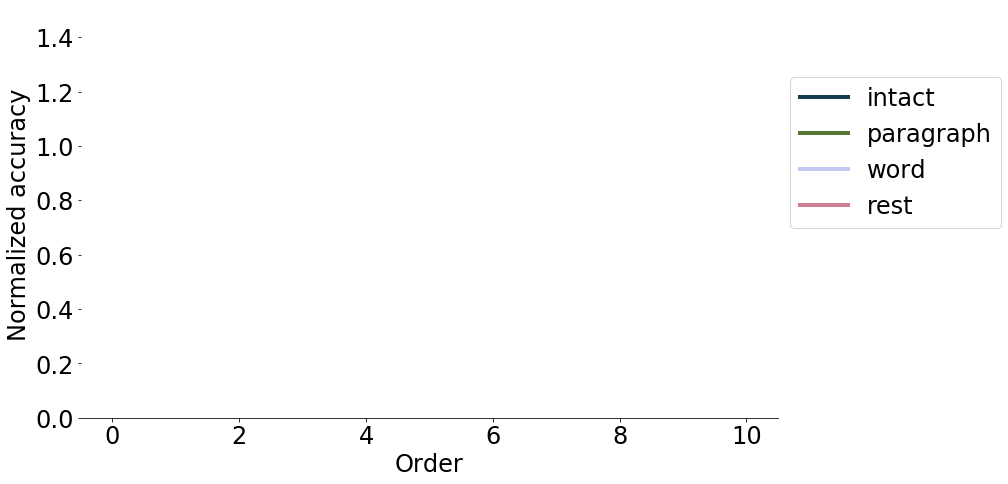

['Condition', 'intact', 'paragraph', 'rest', 'word']


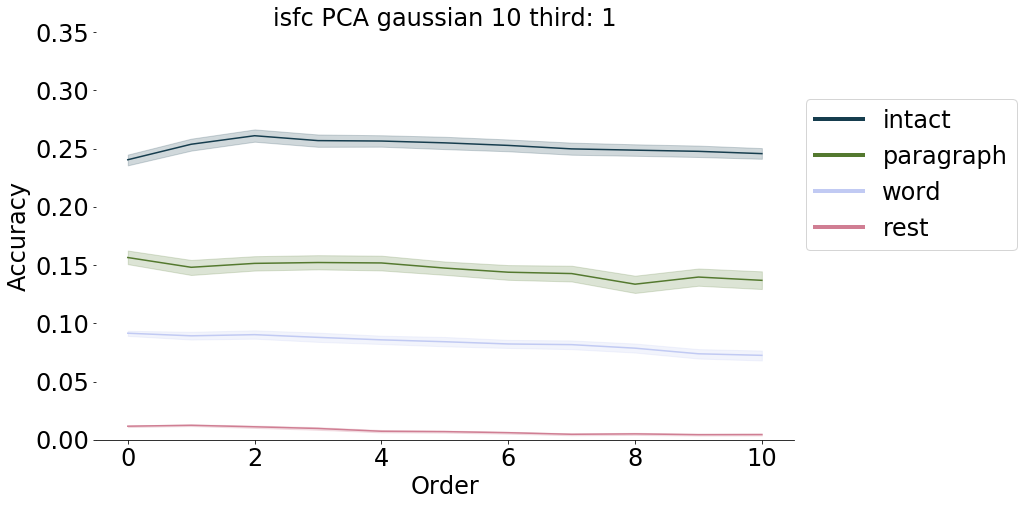

['Condition', 'intact', 'paragraph', 'rest', 'word']


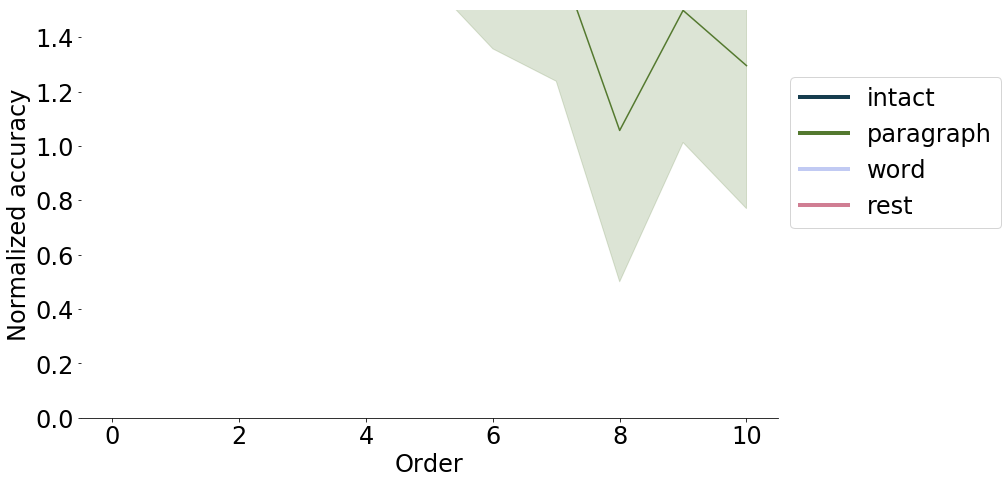

In [70]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)
            
    full_data = full_data.rename(index=str, columns={"level": "Level", "accuracy": "Accuracy", "condition": "Condition", "third":"Third"})

    
    for t in range(2):
        
        full_data_third = full_data[full_data['Third'] == t]

        full_data_third['Relative accuracy'] = full_data_third['Accuracy'] - chance
        full_data_third['Normalized accuracy']= full_data_third['Accuracy'] - np.min(full_data_third.groupby('Level')['Accuracy'].mean())
        full_data_third['Normalized accuracy'] = full_data_third['Normalized accuracy'] / np.max(full_data_third.groupby('Level')['Normalized accuracy'].mean())
        
        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.pdf')
        grouped_lineplot(full_data_third, 'Level','Accuracy', 'Condition', ymin=0, ymax=.35, title=title, outfile=outfile)
        plt.show()
        plt.close()
        
        outfile = os.path.join(figdir, param_name + '_normalized_line_'+ analysis_name + '.pdf')
        grouped_lineplot(full_data_third, 'Level', 'Normalized accuracy','Condition', title = '', ymin=0, ymax=1.5, outfile=outfile)
        plt.show()
        plt.close()
        
        